# Учебный проект 5_Статистический анализ данных

## Содержание

* [Описание проекта](#описание-проекта)
* [Импорт библиотек Python и загрузка данных](#импорт-библиотек-python-и-загрузка-данных)
* [Предобработка данных](#Предобработка)
    * [Обработка пустых значений](#Предобработка_пустоты)
    * [Преобразование типов данных в столбцах таблицы](#Предобработка_типы)
    * [Проверка датасета на наличие дубликатов](#Предобработка_дубликаты)
    * [Инициализация новых столбцов в наборе данных](#Предобработка_столбцы)
* [Исследовательский анализ данных](#Исследование)
    * [Построение гистограмм распределения значений](#Исследование_гистограммы)
    * [Изучение скорости продажи недвижимости](#Исследование_показОбъявлений)
    * [Обработка аномальных значений в наборе данных](#Исследование_аномалии)
    * [Изучение стоимости жилья в 10 самых популярных населенных пунктах](#Изучение_топ10)
    * [Изучение стоимости недвижимости в Санкт-Петербурге в зависимости от расположения от центра город](#Исследование_центрПитера)
* [Вывод](#Вывод)

## Описание проекта <a class = 'anchor' id = 'Описание'></a>

На исследовании находятся данные о пользователях сервиса аренды самокатов "GoFast" — `архив о поездках пользователей из нескольких городов, а также данные самих пользователей`. 

**Задача**: `Проверить статистические гипотезы`

1. Тратят ли пользователи с подпиской **больше** времени на поездки?
2. Расстояние одной поездки в **3 130 метров** - оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает **3 130 метров**?
3. Влияет ли подписка на выручку - `будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки`;
4. Повлияло ли обновление серверов в комании на количество обращений - `снизилось ли количество запросов в службу техподдержки?`

---

Путь решения: `Проведение исследовательского анализа данных и установка параметров, влияющих на цену объектов`. В дальнейшем это послужит основой для построения автоматизированной системы: она отследит аномалии и мошенническую деятельность. 

---

`Располагаемые данные`

**Данные пользователей - users_go**
* user_id - уникальный идентификатор пользователя;
* name - имя пользователя;
* age - возраст;
* city - город;
* subscription_type - тип подписки (free, ultra);

**Данные о поездках - rides_go**
* user_id - уникальный идентификатор пользователя;
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах);
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
* date - дата совершения поездки;

**Данные о подписках - subscriptions_go**
* subscription_type - тип подписки;
* minute_price - стоимость одной минуты поездки по данной подписке;
* start_ride_price - стоимость начала поездки;
* subscription_fee - стоимость ежемесячного платежа;

## Импорт библиотек Python и загрузка данных <a class = 'anchor' id = 'Импорт'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
    * для проведения статистического анализа.
2. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменных в соответствие с названиями загружаемых датасетов: **users**, **rides**, **subscriptions**;
3. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * перечень столбцов набора данных;
    * общей информации о наборе данных;
4. Построение гистограмм распределения числовых показателей;
5. Формирование вывода по итогам данного этапа.

In [1]:
# импорт библиотек Python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# для проведения статистического анализа
import scipy.stats as st

In [2]:
# загрузка данных в рабочую среду - инициализация соответствующих переменных
try:
    users = pd.read_csv('C:/Users/k.storozhuk/Desktop/YandexPraktikum_projects/datasets/users_go.csv')
    rides = pd.read_csv('C:/Users/k.storozhuk/Desktop/YandexPraktikum_projects/datasets/rides_go.csv')
    subscriptions = pd.read_csv('C:/Users/k.storozhuk/Desktop/YandexPraktikum_projects/datasets/subscriptions_go.csv')
except:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

Структура набора данных users


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None



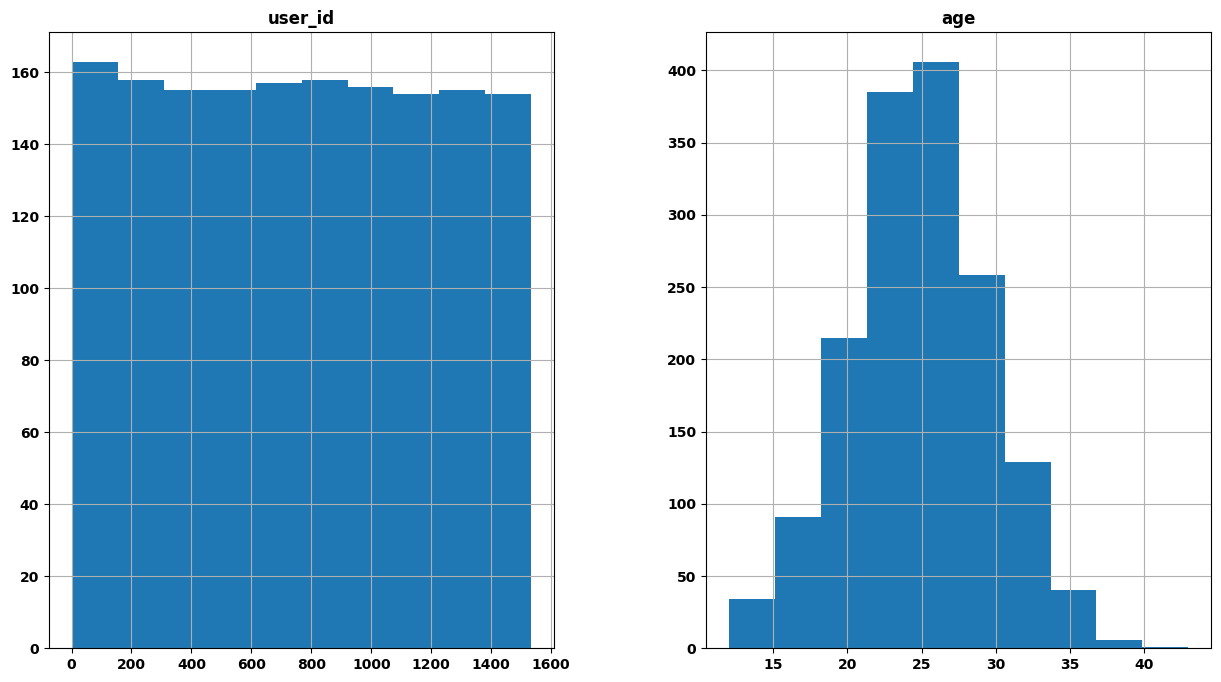

Структура набора данных rides


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None



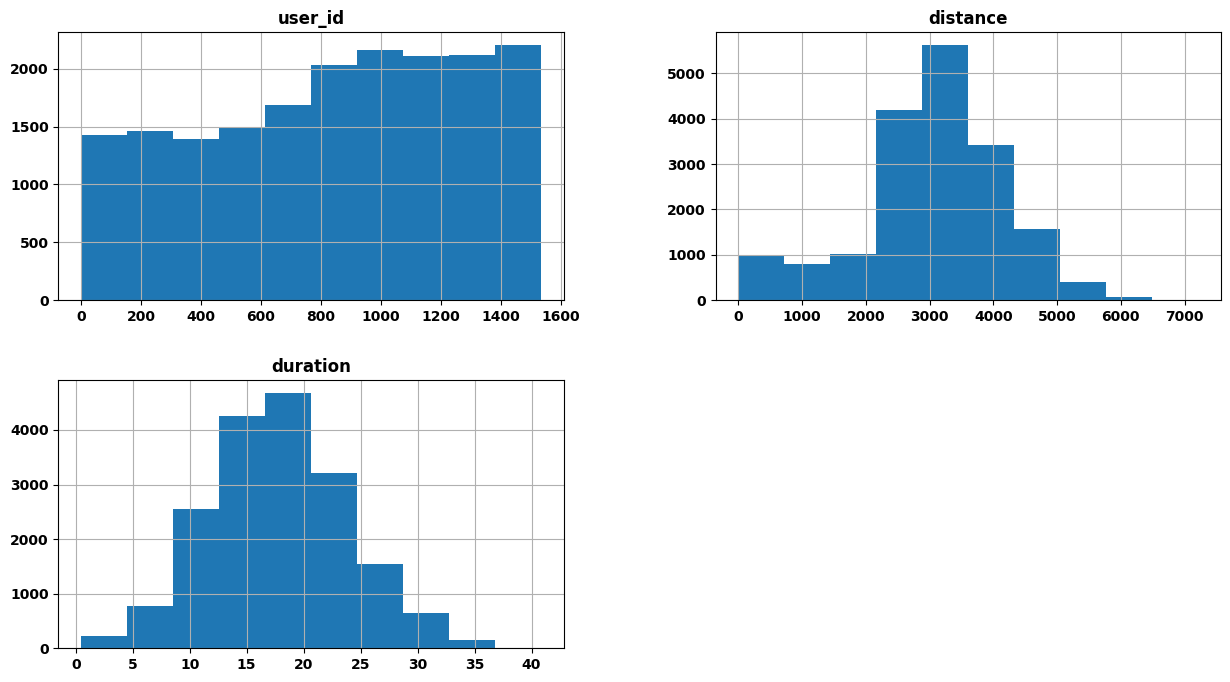

Структура набора данных subscriptions


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes
None



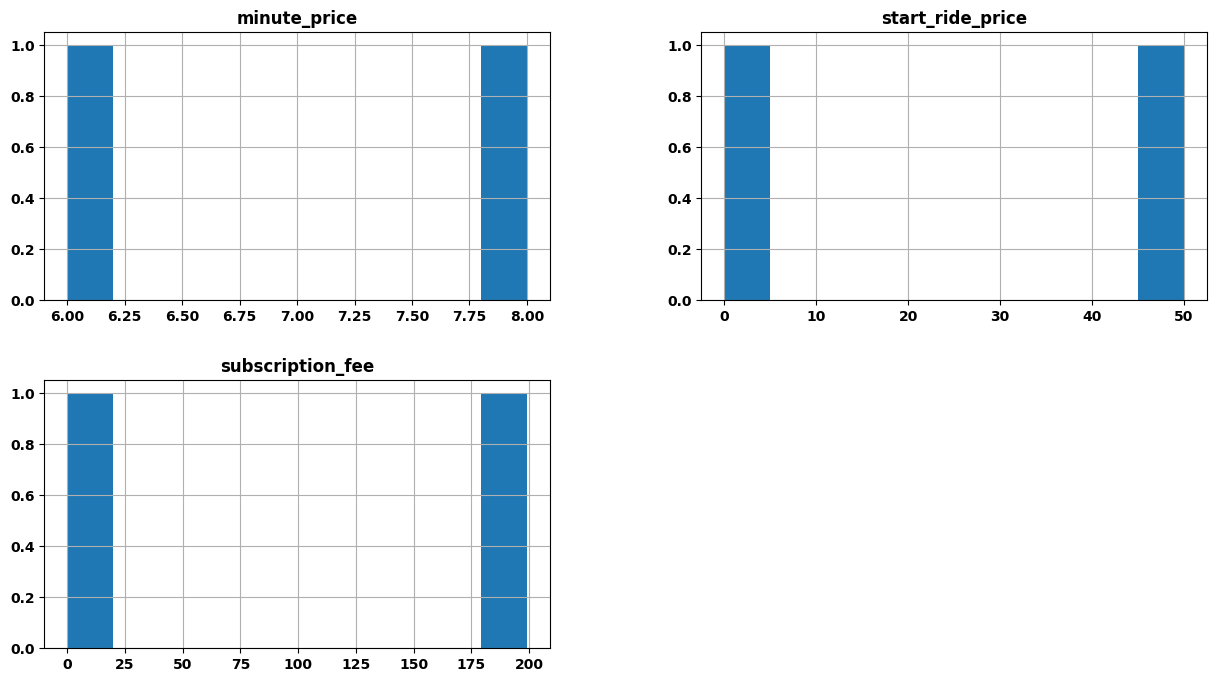

In [9]:
# пользовательская функция для первичного изучения содержимого наборов данных
def  first_meeting (df : pd.DataFrame, df_name : str) -> None:
    print(f'Структура набора данных {df_name}')
    display(df.head())
    print()
    print(df.info())
    print()
    df.hist(figsize=(15, 8))
    plt.show()

# вывод на экран параметров датасетов
first_meeting(users, 'users')
first_meeting(rides, 'rides')
first_meeting(subscriptions, 'subscriptions')